# Name: Hanan Fared Mohamed Omara , ID =  20398559

## Import Libraries

In [1]:
# Import libraries
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install datasets
!pip install transformers
from transformers import AutoTokenizer
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip uninstall -y tensorflow

In [3]:
pip install tensorflow-gpu==2.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Lab 3 aims to practice usage of hugging face and fine tune transformers for classification task.
The dataset is the emotions from hugging face.

https://huggingface.co/datasets/dair-ai/emotion

This lab contains 3 tasks.

---
<h1><font color = blue >Question 1</font></h1>

---

Load in the emotions dataset and provide basic statistics of the dataset. Specifically your code should answer:

1. How many tweets (sentences) was used to train, test and validation?
2. Show 5 samples from the dataset
3.  What are the target predict labels?
4. What are the distributions of labels in train, test, and validation (visualize the results using plots)
5. Analyze the words per tweet in the train, test, validation.

## Load Dataset

In [4]:
from datasets import load_dataset
# Load the "dair-ai/emotion" dataset
dataset = load_dataset('dair-ai/emotion')


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
df_train = pd.DataFrame.from_dict(dataset['train'])
X_train = df_train.text.values
y_train = df_train.label.values

In [7]:
df_val = pd.DataFrame.from_dict(dataset['validation'])
X_val = df_val.text.values
y_val = df_val.label.values

In [8]:
df_test = pd.DataFrame.from_dict(dataset['test'])
X_test = df_test.text.values
y_test = df_test.label.values

In [9]:
# set up GPU
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")



There are 1 GPU(s) available.
Device name: Tesla T4


>How many tweets (sentences) was used to train, test and validation?

In [10]:
# print the number of tweets (sentences) was used to train, test and validation
print("Number of training sentences:", len(X_train))
print("Number of testing sentences:", len(X_test))
print("Number of validation sentences:", len(X_val))

Number of training sentences: 16000
Number of testing sentences: 2000
Number of validation sentences: 2000


> Show 5 samples from the dataset

In [ ]:
# put your code for Q1 here, you can have multiple code blocks.
# Display 5 samples from the test data
X_train_df = pd.DataFrame(X_train,columns=['text'])
X_train_df.sample(5)


,text
13644,i guess im feeling a bit vulnerable and lookin...
14313,i feel so privileged to share that love with f...
2182,i am feeling it and it s really ok
13941,i do i feel like i just make him mad or upset ...
7366,i hate feeling alone


In [ ]:
X_test_df = pd.DataFrame(X_test,columns=['text'])
X_test_df.sample(5)

,text
1406,i feel like i am actually a creative person now
462,i don t want to tag people who think this is s...
149,i feel that i need to know that i can depend o...
1576,i cant do a simple math question and guess wha...
165,i enjoy my colleagues i m not feeling very soc...


In [ ]:
X_val_df = pd.DataFrame(X_val,columns=['text'])
X_val_df.sample(5)

,text
1438,i must say it was first numb then ouch my head...
424,i believe everyone can feel energetic after li...
374,i legislators certainly feel they need this pr...
1220,im assuming the inquisition er did not mean su...
1637,i need not feel annoyed that they beg but rath...


> What are the target predict labels?

In [ ]:
#the target predict labels
y_train_df = pd.DataFrame(y_train,columns=['label'])
y_train_df.head()

,label
0,0
1,0
2,3
3,2
4,3


In [ ]:
y_val_df = pd.DataFrame(y_val,columns=['label'])
y_val_df.head()

,label
0,0
1,0
2,2
3,3
4,1


In [ ]:
y_test_df = pd.DataFrame(y_test,columns=['label'])
y_test_df.head()

,label
0,0
1,0
2,0
3,1
4,0


> What are the distributions of labels in train, test, and validation (visualize the results using plots)

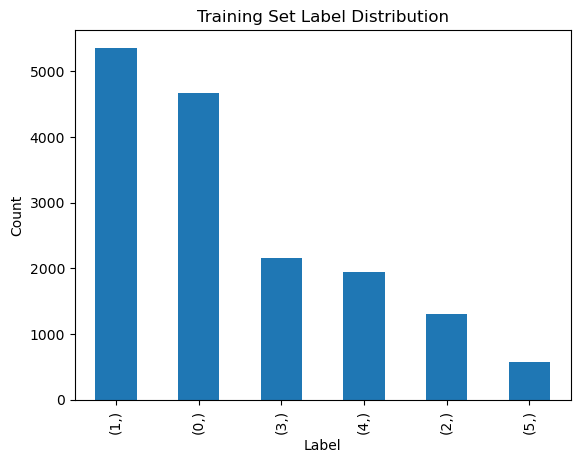

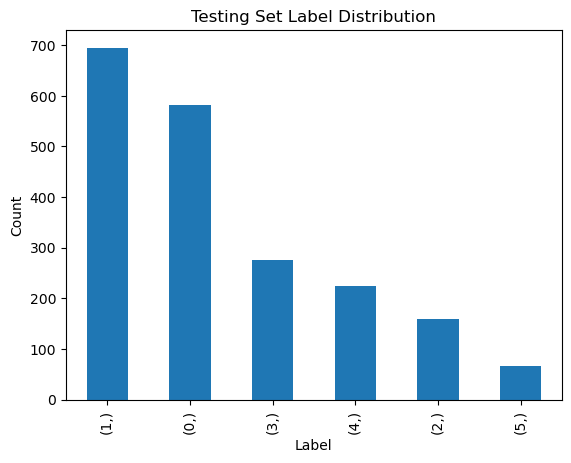

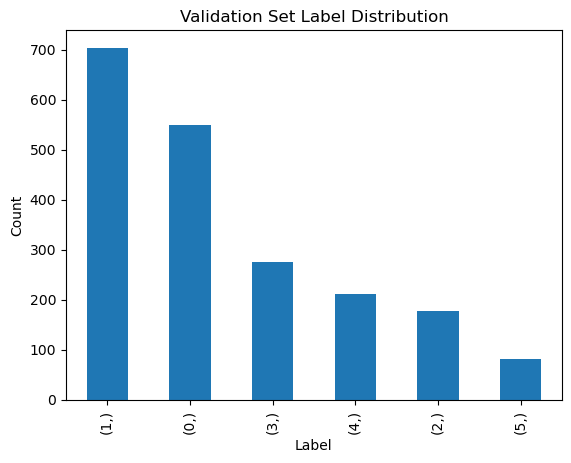

In [ ]:
# Assuming you have a DataFrame named "df_train" with a "label" column containing the training labels
train_counts =y_train_df.value_counts()
train_counts.plot(kind='bar')
plt.title('Training Set Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Assuming you have a DataFrame named "df_test" with a "label" column containing the testing labels
test_counts = y_test_df.value_counts()
test_counts.plot(kind='bar')
plt.title('Testing Set Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Assuming you have a DataFrame named "df_val" with a "label" column containing the validation labels
val_counts = y_val_df.value_counts()
val_counts.plot(kind='bar')
plt.title('Validation Set Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

> Analyze the words per tweet in the train, test, validation.

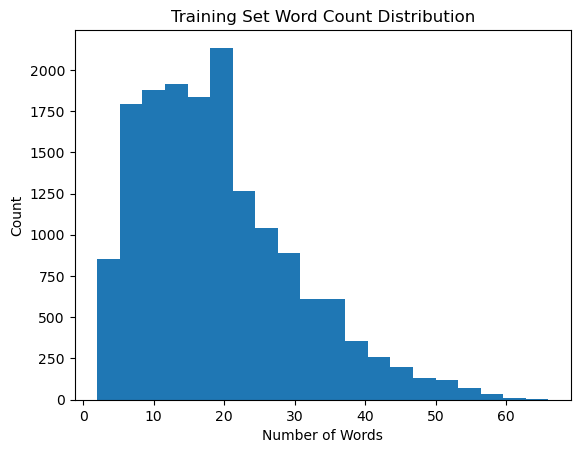

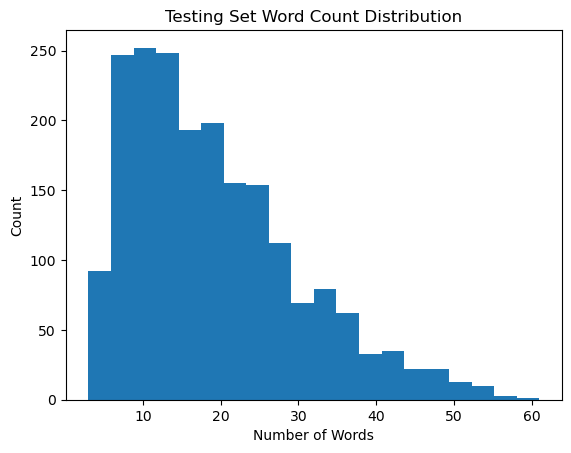

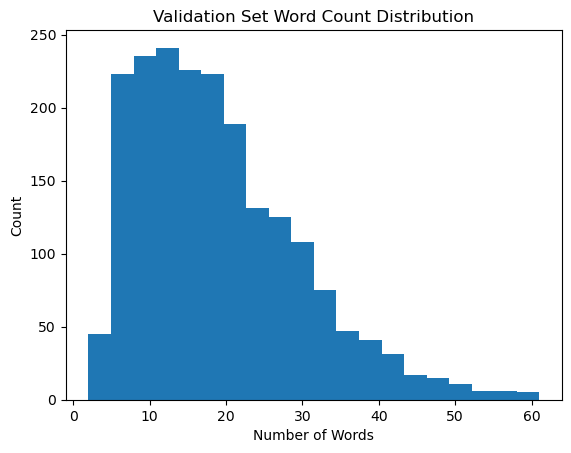

In [ ]:
# Assuming you have a DataFrame named "df_train" with a "text" column containing the training tweets
train_word_counts =X_train_df['text'].apply(lambda x: len(x.split()))
train_word_counts.plot(kind='hist', bins=20)
plt.title('Training Set Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

# Assuming you have a DataFrame named "df_test" with a "text" column containing the testing tweets
test_word_counts = X_test_df['text'].apply(lambda x: len(x.split()))
test_word_counts.plot(kind='hist', bins=20)
plt.title('Testing Set Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

# Assuming you have a DataFrame named "df_val" with a "text" column containing the validation tweets
val_word_counts = X_val_df['text'].apply(lambda x: len(x.split()))
val_word_counts.plot(kind='hist', bins=20)
plt.title('Validation Set Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

Summarize your answers to Q1 below, based on your analysis:


---
<h1><font color = blue>Summarize your answers to Q2 below, based on your analysis</font></h1>

---

-  First, Load the emotions dataset, then answer these questions:

1. How many tweets (sentences) was used to train, test and validation?
  - we got these results from code
    - Number of training sentences: 16000
    - Number of testing sentences: 2000
    - Number of validation sentences: 2000
2. Show 5 samples from the dataset
  - I show that in the code above.
3.  What are the target predict labels?
  - There are `6 classes` in the target labels start from 0 to 5.
4. What are the distributions of labels in train, test, and validation (visualize the results using plots)
   - the code of visualization show that.
5. Analyze the words per tweet in the train, test, validation.
  - Also, the code with plot show that.

---
<h1><font color = green>Question 2</font></h1>

---

Tokenization. Use two different tokenization models provided by hugging face.

For instance:
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

For each tokenizer:

Report the tokenizer's vocabulary size.

Present the tokenization results for the two selected tokenizers on three examples.



In [11]:
def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [12]:
# Assuming you have a DataFrame named "X_train_df" with a column named "text"
print('Original: ', X_train[0])
print('Processed: ', text_preprocessing(X_train[0]))

Original:  i didnt feel humiliated
Processed:  i didnt feel humiliated


In [14]:
# put your code for Q2 here, you can have multiple code blocks.
from transformers import AutoTokenizer

# Define the two models
model_name_1 = 'distilbert-base-uncased'
model_name_2 = 'bert-base-uncased'

# Load the tokenizers
tokenizer_1 = AutoTokenizer.from_pretrained(model_name_1)
tokenizer_2 = AutoTokenizer.from_pretrained(model_name_2)

# Print the vocabulary sizes
print(f"Vocabulary size for {model_name_1}: {tokenizer_1.vocab_size}")
print(f"Vocabulary size for {model_name_2}: {tokenizer_2.vocab_size}")

# Define some example texts
example_texts = [
    "This is the first example text.",
    "Here's another example text, but this one is longer.",
    "The third example text is the shortest."
]

# Tokenize the examples using the two models
for text in X_train[0]:
    print(f"Tokenization results for '{text}':")
    print(f"  - {model_name_1}: {tokenizer_1.tokenize(text)}")
    print(f"  - {model_name_2}: {tokenizer_2.tokenize(text)}")
    print()

Vocabulary size for distilbert-base-uncased: 30522
Vocabulary size for bert-base-uncased: 30522
Tokenization results for 'i':
  - distilbert-base-uncased: ['i']
  - bert-base-uncased: ['i']

Tokenization results for ' ':
  - distilbert-base-uncased: []
  - bert-base-uncased: []

Tokenization results for 'd':
  - distilbert-base-uncased: ['d']
  - bert-base-uncased: ['d']

Tokenization results for 'i':
  - distilbert-base-uncased: ['i']
  - bert-base-uncased: ['i']

Tokenization results for 'd':
  - distilbert-base-uncased: ['d']
  - bert-base-uncased: ['d']

Tokenization results for 'n':
  - distilbert-base-uncased: ['n']
  - bert-base-uncased: ['n']

Tokenization results for 't':
  - distilbert-base-uncased: ['t']
  - bert-base-uncased: ['t']

Tokenization results for ' ':
  - distilbert-base-uncased: []
  - bert-base-uncased: []

Tokenization results for 'f':
  - distilbert-base-uncased: ['f']
  - bert-base-uncased: ['f']

Tokenization results for 'e':
  - distilbert-base-uncased: ['

In [50]:
# Tokenize the examples using the two models
for text in X_train[4]:
    print(f"Tokenization results for '{text}':")
    print(f"  - {model_name_1}: {tokenizer_1.tokenize(text)}")
    print(f"  - {model_name_2}: {tokenizer_2.tokenize(text)}")
    print()

Tokenization results for 'i':
  - distilbert-base-uncased: ['i']
  - bert-base-uncased: ['i']

Tokenization results for ' ':
  - distilbert-base-uncased: []
  - bert-base-uncased: []

Tokenization results for 'a':
  - distilbert-base-uncased: ['a']
  - bert-base-uncased: ['a']

Tokenization results for 'm':
  - distilbert-base-uncased: ['m']
  - bert-base-uncased: ['m']

Tokenization results for ' ':
  - distilbert-base-uncased: []
  - bert-base-uncased: []

Tokenization results for 'f':
  - distilbert-base-uncased: ['f']
  - bert-base-uncased: ['f']

Tokenization results for 'e':
  - distilbert-base-uncased: ['e']
  - bert-base-uncased: ['e']

Tokenization results for 'e':
  - distilbert-base-uncased: ['e']
  - bert-base-uncased: ['e']

Tokenization results for 'l':
  - distilbert-base-uncased: ['l']
  - bert-base-uncased: ['l']

Tokenization results for 'i':
  - distilbert-base-uncased: ['i']
  - bert-base-uncased: ['i']

Tokenization results for 'n':
  - distilbert-base-uncased: ['n

In [51]:
# Tokenize the examples using the two models
for text in X_train[6]:
    print(f"Tokenization results for '{text}':")
    print(f"  - {model_name_1}: {tokenizer_1.tokenize(text)}")
    print(f"  - {model_name_2}: {tokenizer_2.tokenize(text)}")
    print()

Tokenization results for 'i':
  - distilbert-base-uncased: ['i']
  - bert-base-uncased: ['i']

Tokenization results for 'v':
  - distilbert-base-uncased: ['v']
  - bert-base-uncased: ['v']

Tokenization results for 'e':
  - distilbert-base-uncased: ['e']
  - bert-base-uncased: ['e']

Tokenization results for ' ':
  - distilbert-base-uncased: []
  - bert-base-uncased: []

Tokenization results for 'b':
  - distilbert-base-uncased: ['b']
  - bert-base-uncased: ['b']

Tokenization results for 'e':
  - distilbert-base-uncased: ['e']
  - bert-base-uncased: ['e']

Tokenization results for 'e':
  - distilbert-base-uncased: ['e']
  - bert-base-uncased: ['e']

Tokenization results for 'n':
  - distilbert-base-uncased: ['n']
  - bert-base-uncased: ['n']

Tokenization results for ' ':
  - distilbert-base-uncased: []
  - bert-base-uncased: []

Tokenization results for 't':
  - distilbert-base-uncased: ['t']
  - bert-base-uncased: ['t']

Tokenization results for 'a':
  - distilbert-base-uncased: ['a

In [52]:
# Tokenize the examples using the two models
for text in X_train:
    print(f"Tokenization results for '{text}':")
    print(f"  - {model_name_1}: {tokenizer_1.tokenize(text)}")
    print(f"  - {model_name_2}: {tokenizer_2.tokenize(text)}")
    print()

Streaming output truncated to the last 5000 lines.
Tokenization results for 'i want to help each of them feel special she said':
  - distilbert-base-uncased: ['i', 'want', 'to', 'help', 'each', 'of', 'them', 'feel', 'special', 'she', 'said']
  - bert-base-uncased: ['i', 'want', 'to', 'help', 'each', 'of', 'them', 'feel', 'special', 'she', 'said']

Tokenization results for 'i personally feel amazed that i have managed to connect with such amazingly talented and creative people through this little world of dance':
  - distilbert-base-uncased: ['i', 'personally', 'feel', 'amazed', 'that', 'i', 'have', 'managed', 'to', 'connect', 'with', 'such', 'amazingly', 'talented', 'and', 'creative', 'people', 'through', 'this', 'little', 'world', 'of', 'dance']
  - bert-base-uncased: ['i', 'personally', 'feel', 'amazed', 'that', 'i', 'have', 'managed', 'to', 'connect', 'with', 'such', 'amazingly', 'talented', 'and', 'creative', 'people', 'through', 'this', 'little', 'world', 'of', 'dance']

Tokenizat

In [15]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [16]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )

        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

- Before tokenizing, we need to specify the maximum length of our sentences.

In [17]:
# Encode our concatenated data
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in X_train]

# Find the maximum length
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  87


In [18]:

# Encode our concatenated data
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in X_test]

# Find the maximum length
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  66


In [19]:
# Specify `MAX_LEN`
MAX_LEN = 87

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X_train[0]])[0].squeeze().numpy())
print('Original: ', X_train[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  i didnt feel humiliated
Token IDs:  [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tokenizing data...


In [20]:
val_inputs

tensor([[  101, 10047,  3110,  ...,     0,     0,     0],
        [  101,  1045,  2514,  ...,     0,     0,     0],
        [  101,  1045,  2514,  ...,     0,     0,     0],
        ...,
        [  101,  1045,  2514,  ...,     0,     0,     0],
        [  101,  1045,  5621,  ...,     0,     0,     0],
        [  101,  1045,  2514,  ...,     0,     0,     0]])

In [21]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

---
<h1><font color = green>Summarize your answers to Q2 below, based on your analysis </font></h1>

---

- I Apply Tokenization. Using  two different tokenization models provided by hugging face.
1. model_name_1 = 'distilbert-base-uncased'
2. model_name_2 = 'bert-base-uncased'


> For each tokenizer:

   - Report the tokenizer's vocabulary size.
    1. Vocabulary size for distilbert-base-uncased: 30522
    2. Vocabulary size for bert-base-uncased: 30522

> Present the tokenization results for the two selected tokenizers on three examples.
  - Here, I apply tokenization in different three record of dataset also try on all dataset with two different tokenization models.

---
<h1><font color = purple>Question 3</font></h1>

---
Use one pretrained model offered by Huggingface, e.g., 'distilbert-base-uncased' to train a emotion classification model from train and report their performances on the validation dataset, in terms of accuracy, F1 score, precision and recall.

In [ ]:
# put your code for Q3 here, you can have multiple code blocks.

In [22]:
%%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 6

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 51.1 ms, sys: 1.06 ms, total: 52.2 ms
Wall time: 83 ms


In [23]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [25]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch

            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")

    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to device
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

Now, let's start training our BertClassifier!

In [26]:
set_seed(10)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch 

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   1.593097   |     -      |     -     |   11.40  
   1    |   40    |   1.247116   |     -      |     -     |   8.30   
   1    |   60    |   1.012850   |     -      |     -     |   8.36   
   1    |   80    |   0.863833   |     -      |     -     |   8.42   
   1    |   100   |   0.696300   |     -      |     -     |   8.49   
   1    |   120   |   0.545202   |     -      |     -     |   8.56   
   1    |   140   |   0.436339   |     -      |     -     |   8.66   
   1    |   160   |   0.367190   |     -      |     -     |   8.70   
   1    |   180   |   0.388919   |     -      |     -     |   8.86   
   1    |   200   |   0.348232   |     -      |     -     |   8.94   
   1    |   220   |   0.365758   |     -      |     -     |   9.08   
   1    |   240   |   0.262916   |     -      |     -     |   9.03   


 > Evaluation on Validation Set

In [29]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess text
X_train_preprocessed = np.array([text_preprocessing(text) for text in X_train])
X_val_preprocessed = np.array([text_preprocessing(text) for text in X_val])

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train_preprocessed)
X_val_tfidf = tf_idf.transform(X_val_preprocessed)

CPU times: user 3.55 s, sys: 162 ms, total: 3.71 s
Wall time: 5.02 s


In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_1(model, dataloader):
    """Evaluate the performance of the trained BERT model on the validation set."""
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []
    all_labels = []

    # For each batch in our validation set...
    for batch in dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        all_logits.append(logits)
        all_labels.append(b_labels)

    # Concatenate logits and labels from each batch
    all_logits = torch.cat(all_logits, dim=0)
    all_labels = torch.cat(all_labels, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    # Get the predicted labels by taking the index of the class with the highest probability
    y_pred = np.argmax(probs, axis=1)

    # Compute the accuracy, F1 score, precision, and recall
    accuracy = accuracy_score(all_labels.cpu().numpy(), y_pred)
    f1 = f1_score(all_labels.cpu().numpy(), y_pred, average='macro')
    precision = precision_score(all_labels.cpu().numpy(), y_pred, average='macro')
    recall = recall_score(all_labels.cpu().numpy(), y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

In [49]:
# Compute predicted probabilities on the test set
probs = evaluate_1(bert_classifier, val_dataloader)

Accuracy: 0.9440
F1 Score: 0.9180
Precision: 0.9324
Recall: 0.9062


---
<h1><font color = purple>Summarize your answers to Q3 below, based on your analysis</font></h1>

---
> I use BertTokenizer model to train a emotion classification model from train and report their performances on the validation dataset, in terms of accuracy, F1 score, precision and recall.
as l got these results
   1. Accuracy: 0.9440
   2. F1 Score: 0.9180
   3. Precision: 0.9324
   4. Recall: 0.9062
   